In [2]:
!wget https://github.com/martin98-afk/cs542data/raw/main/telecom_users.csv

--2021-06-23 16:04:29--  https://github.com/martin98-afk/cs542data/raw/main/telecom_users.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/martin98-afk/cs542data/main/telecom_users.csv [following]
--2021-06-23 16:04:29--  https://raw.githubusercontent.com/martin98-afk/cs542data/main/telecom_users.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 853943 (834K) [text/plain]
Saving to: ‘telecom_users.csv’

telecom_users.csv   100%[===================>] 833.93K  --.-KB/s    in 0.09s   

2021-06-23 16:04:30 (8.89 MB/s) - ‘telecom_users.csv’ saved [853943/853943]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/telecom_users.csv',header=None)

In [4]:
useful_data = data.iloc[1:,2:]

In [5]:
# factorize data, turn categorical data in the file to int value data
cat = [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,19]
for i in cat:
    useful_data[i+2] = pd.factorize(useful_data[i+2])[0]
data = useful_data.values
# there are still some column's real value in string format, convert them in to float fomat
missing_value = []
for i in range(data.shape[1]):
    if i not in cat:
        for j in range(data.shape[0]):
            if data[j,i] != ' ':
                data[j,i] = float(data[j,i])
            else:
                data[j,i] = 0
                missing_value.append([j,i])

Clustomer who stayed: 4398
Customers who left : 1587


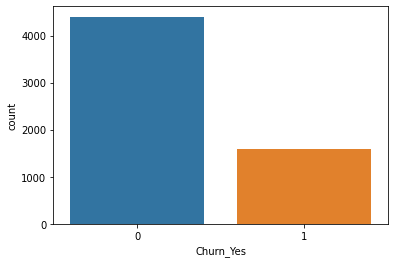

In [6]:
import seaborn as sns
df = pd.read_csv('/content/telecom_users.csv')
df = df.iloc[1:,2:]
# get dummies
df = pd.get_dummies(df,drop_first = True)
# Displaying the count for non Deviated hole 
majority_class = df.loc[df['Churn_Yes'] == 0].count()[0]

# Showing the count for Deviated hole 
minority_class = df.loc[df['Churn_Yes'] == 1].count()[0]

# Printing the classes for the deviated and non-deviated class 
print('Clustomer who stayed: {}'.format(majority_class))
print('Customers who left : {}'.format(minority_class))


sns.countplot(x="Churn_Yes", data=df)
plt.show()

# try different ways to deal with missing data.

In [ ]:
data.shape

(5986, 20)

In [7]:
#impute missing value with mean
#option 1 impute missing data with mean
# for i in range(len(missing_value)):
#     data[missing_value[0][0],missing_value[0][1]] = np.mean(data[:,missing_value[0][1]])

#option 2 just delete the missing data 
mis_index = [index[0] for index in missing_value]
data_new = []
for i in range(data.shape[0]):
    if i not in mis_index:
        data_new.append(data[i,:])
data = np.array(data_new)

# the result shows that it is better to just delete the missing data than impute the missing value with mean.



> option 1 result:

                 precision    recall     f1-score    support

           0       0.85      0.89      0.87       895
           1       0.61      0.52      0.56       303

    accuracy                           0.79      1198
    macro avg          0.73      0.71      0.71      1198
    weighted avg        0.79      0.79      0.79      1198



> option 2 result:

                 precision    recall     f1-score     support

           0       0.85      0.91      0.88       884
           1       0.67      0.53      0.59       312

    accuracy                           0.81      1196
    macro avg         0.76      0.72      0.73      1196
    weighted avg        0.80      0.81      0.80      1196



In [ ]:
data.shape

(5976, 20)

In [8]:
# normalization
def features(data):
    real = [4,17,18] # real value columns in data
    for real_index in real:
        data[:,real_index] = (data[:,real_index]-data[:,real_index].mean())/data[:,real_index].std()
    print(data)
    return data
data = features(data)

[[0 0 0 ... -1.353483152796464 -0.24776880175928453 0]
 [1 0 1 ... 0.7740664189002279 0.736669251021817 0]
 [1 1 0 ... 0.33560187016648335 0.25145349728121336 1]
 ...
 [0 0 0 ... -1.4514733360362024 -0.8760184286173319 0]
 [0 1 1 ... 1.1494186462253273 -0.4828236985502871 1]
 [0 0 1 ... -1.4963163012476082 -0.8095038296657152 0]]


# first we use normal logistic regression to classify the data

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test = train_test_split(data[:,:-1],data[:,-1],test_size = 0.2,random_state = 42)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [10]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.fit(x_train,y_train)

predict_results=model.predict(x_test)
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test,predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

0.8093645484949833
[[803  81]
 [147 165]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       884
           1       0.67      0.53      0.59       312

    accuracy                           0.81      1196
   macro avg       0.76      0.72      0.73      1196
weighted avg       0.80      0.81      0.80      1196



# the accuracy of the model is 0.81, it seems good, but when we see the accuracy and recall of different class. We can find that the accuracy and recall of determining the customer is going to churn are lower than 0.7.

# Before going into the Modelling ,it should be noted that our data is highly sensitive to False Negative.Let suppose a customer has high probability to leave the sevice(churn) ,but if our model predict that he is not going to leave (not churn) which is False Negative, then company will not be primarily focusing to that customer's services and then customer will definatly leave the sevices(churn) which results in loss to the company. And if customer is not willing to leave the services and is satisfied, but our model tells that he is going to leave the services then company will provide him extra benefits ,offers and then customer will become extra happy. Thats why we will not focus on getting best accuracy but try to get best Recall Score.here we explore different methods to increase the particularly class's recall.

# 1. (Add penalization) logistic regression with penalization to force the classifier to be more likely to classify 1 than 0 in order to increase the recall of classifying 1.

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss_function(label,z,penalize):
    return -np.mean((label*np.log(z)+(1-label)*np.log(1-z)) - penalize*(1-z)**2)

def predict(X,w,b):
    pred = sigmoid((w.T.dot(X)+b).astype('float'))
    return np.round(pred)

def gradientDescentOneStep(X,Y,w,b,alpha,penalize):
    m = Y.shape[0]
    a = w.T.dot(X)+b
    z = sigmoid(a.astype('float'))
    dz = z - Y - 2*penalize*(1-z)**2*z
    dw = 1/m*X.dot(dz.T)
    db = 1/m*np.sum(dz)
    w = w - alpha * dw
    b = b - alpha * db
    loss = loss_function(Y,z,penalize)
    return w,b,loss

def gradientDescent(X,Y,w,b,alpha,iternum,penalize):
    loss_curve = []
    for i in range(iternum):
        w,b,loss = gradientDescentOneStep(X,Y,w,b,alpha,penalize)
        loss_curve.append(loss)
    return w,b,loss_curve

def parameter_initialize(size):
    return np.zeros(size),0


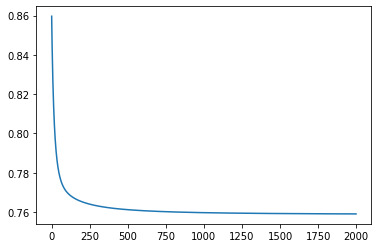

In [12]:
import matplotlib.pyplot as plt
n = x_train.shape[1]
w,b = parameter_initialize((n,1))
w,b,loss_curve = gradientDescent(x_train.T,y_train,w,b,alpha=0.1,iternum = 2000,penalize = 0.666)
plt.plot(loss_curve)

In [13]:
predict_results=np.squeeze(predict(x_test.T,w,b))
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test,predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

0.7675585284280937
[[686 198]
 [ 80 232]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       884
           1       0.54      0.74      0.63       312

    accuracy                           0.77      1196
   macro avg       0.72      0.76      0.73      1196
weighted avg       0.80      0.77      0.78      1196



In [ ]:
import matplotlib.pyplot as plt
n = x_train.shape[1]
penalize = [ 2/i for i in range(1,21)]

F_acc_list=[]
F_recall_list = []
T_acc_list = []
T_recall_list = [] 
T_F1_list1 = []
F_F1_list1 = []

for i in penalize:
    w,b = parameter_initialize((n,1))
    w,b,loss_curve = gradientDescent(x_train.T,y_train,w,b,alpha=0.1,iternum = 2000,penalize = i)
    predict_results=np.squeeze(predict(x_test.T,w,b))
    a = classification_report(y_test, predict_results)
    F_acc_list.append(float(a[74:78]))
    F_recall_list.append(float(a[84:88]))
    T_acc_list.append(float(a[128:132]))
    T_recall_list.append(float(a[138:142]))
    F_F1_list1.append(float(a[94:98]))
    T_F1_list1.append(float(a[148:152]))


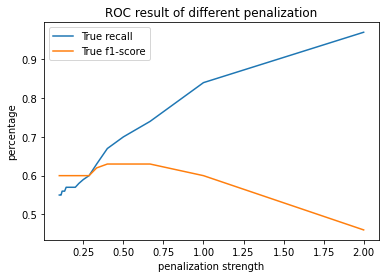

In [ ]:
legend = ['True recall','True f1-score']
plt.title('ROC result of different penalization')
plt.plot(penalize,T_recall_list)
plt.plot(penalize,T_F1_list1)
plt.xlabel('penalization strength')
plt.ylabel('percentage')
plt.legend(legend)

# as we can see from above, penalization greatly affect the ROC result. According to different task. We may particularly want one of these value to be highest. For example, for telecom, Ture recall is the most important one, it is important to find out all possible customers who would like to churn. While detecting who will not churn is not important and even if a customer who won't churn is misclassified as going to churn. It won't hurt a lot. The same thing is also true for cancer detection. We want make sure all possible patient who has cancer to be detected.

# 2. use weighted cross entropy.

In [ ]:
def loss_function(label,z,penalize):
    return -np.mean(( penalize*label*np.log(z)+ (1-penalize)*(1-label)*np.log(1-z)))

def gradientDescentOneStep(X,Y,w,b,alpha,penalize):
    m = Y.shape[0]
    a = w.T.dot(X)+b
    z = sigmoid(a.astype('float'))
    dz = (1-penalize)*z - penalize*Y
    dw = 1/m*X.dot(dz.T)
    db = 1/m*np.sum(dz)
    w = w - alpha * dw
    b = b - alpha * db
    loss = loss_function(Y,z,penalize)
    return w,b,loss

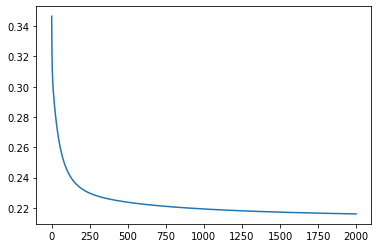

In [ ]:
import matplotlib.pyplot as plt
n = x_train.shape[1]
w,b = parameter_initialize((n,1))
w,b,loss_curve = gradientDescent(x_train.T,y_train,w,b,alpha=0.1,iternum = 2000,penalize = 0.5)
plt.plot(loss_curve)

In [ ]:
predict_results=np.squeeze(predict(x_test.T,w,b))
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test,predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

0.7984949832775919
[[804  80]
 [161 151]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       884
           1       0.65      0.48      0.56       312

    accuracy                           0.80      1196
   macro avg       0.74      0.70      0.71      1196
weighted avg       0.79      0.80      0.79      1196



In [ ]:
import matplotlib.pyplot as plt
n = x_train.shape[1]
penalize = [ 1/i for i in range(1,21)]


F_acc_list=[]
F_recall_list = []
T_acc_list = []
T_recall_list = [] 
T_F1_list2 = []
F_F1_list2 = []

for i in penalize:
    w,b = parameter_initialize((n,1))
    w,b,loss_curve = gradientDescent(x_train.T,y_train,w,b,alpha=0.1,iternum = 2000,penalize = i)
    predict_results=np.squeeze(predict(x_test.T,w,b))
    a = classification_report(y_test, predict_results)
    F_acc_list.append(float(a[74:78]))
    F_recall_list.append(float(a[84:88]))
    T_acc_list.append(float(a[128:132]))
    T_recall_list.append(float(a[138:142]))
    F_F1_list2.append(float(a[94:98]))
    T_F1_list2.append(float(a[148:152]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


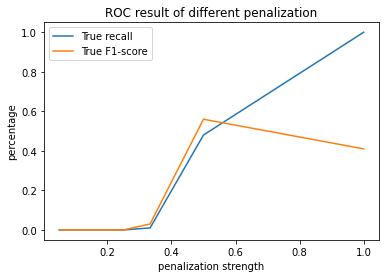

In [ ]:
legend = ['True recall','True F1-score']
plt.title('ROC result of different penalization')
plt.plot(penalize,T_recall_list)
plt.plot(penalize,T_F1_list2)
plt.xlabel('penalization strength')
plt.ylabel('percentage')
plt.legend(legend)

In [ ]:
max(T_F1_list2)

0.56

# 3. decreasing threshold when predicting.

In [14]:
def predict(X,w,b,p):
    pred = sigmoid((w.T.dot(X)+b).astype('float'))
    pred[pred>p] = 1
    pred[pred<=p] = 0
    return pred

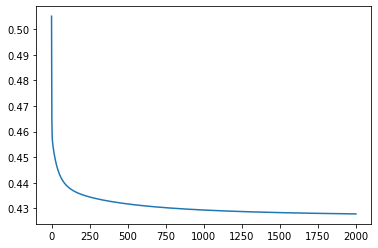

In [15]:
w,b,loss_curve = gradientDescent(x_train.T,y_train,w,b,alpha=0.1,iternum = 2000,penalize = 0)
plt.plot(loss_curve)

In [16]:
predict_results=np.squeeze(predict(x_test.T,w,b,0.333))
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test,predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

0.774247491638796
[[697 187]
 [ 83 229]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       884
           1       0.55      0.73      0.63       312

    accuracy                           0.77      1196
   macro avg       0.72      0.76      0.73      1196
weighted avg       0.80      0.77      0.78      1196



In [17]:
import matplotlib.pyplot as plt
n = x_train.shape[1]
penalize = [ 1/i for i in range(1,21)]

F_acc_list=[]
F_recall_list = []
T_acc_list = []
T_recall_list = [] 
T_F1_list3 = []
F_F1_list3 = []

for i in penalize:
    predict_results=np.squeeze(predict(x_test.T,w,b,i))
    a = classification_report(y_test, predict_results)
    F_acc_list.append(float(a[74:78]))
    F_recall_list.append(float(a[84:88]))
    T_acc_list.append(float(a[128:132]))
    T_recall_list.append(float(a[138:142]))
    F_F1_list3.append(float(a[94:98]))
    T_F1_list3.append(float(a[148:152]))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


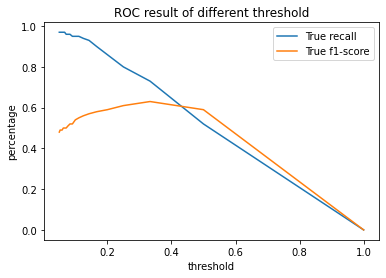

In [18]:
legend = ['True recall','True f1-score']
plt.title('ROC result of different threshold')
plt.plot(penalize,T_recall_list)
plt.plot(penalize,T_F1_list3)
plt.xlabel('threshold')
plt.ylabel('percentage')
plt.legend(legend)

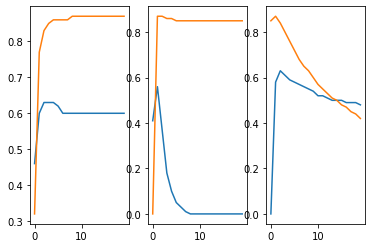

In [ ]:
plt.subplot(1,3,1)
plt.plot(T_F1_list1)
plt.plot(F_F1_list1)
print()
plt.subplot(1,3,2)
plt.plot(T_F1_list2)
plt.plot(F_F1_list2)

plt.subplot(1,3,3)
plt.plot(T_F1_list3)
plt.plot(F_F1_list3)


In [ ]:
print(np.std(T_F1_list1))
print(np.std(T_F1_list2))
print(np.std(T_F1_list3))

0.033656351555092834
0.16098058889195305
0.12487894137924135


# According to the miximum f1-score for class "Churn" is 0.63. Weighted average accuracy equals 0.8, weighted average recall equals 0.77. weighted average f1-score equals 0.78.

# next we also try to do some research about how data unbalancing influence the result of the logistic regression.



> we first select same number of positive and negative data from previous trainning data and input to the first logistic regression model, and test on the same amount data as before. 



In [ ]:
index = np.argsort(y_train)
balanced_data = np.zeros((1258*2,20))

In [ ]:
balanced_data[:1258,:-1] = x_train[index[:1258],:]
balanced_data[1258:,:-1] = x_train[index[-1258:],:]
balanced_data[:1258,-1] = y_train[index[:1258]]
balanced_data[1258:,-1] = y_train[index[-1258:]]
model = LogisticRegression()
model.fit(balanced_data[:,:-1],balanced_data[:,-1])

predict_result = model.predict(x_test)
print(accuracy_score(predict_result, y_test))
conf_mat = confusion_matrix(y_test,predict_result)
print(conf_mat)
print(classification_report(y_test, predict_result))

0.7441471571906354
[[644 240]
 [ 66 246]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       884
           1       0.51      0.79      0.62       312

    accuracy                           0.74      1196
   macro avg       0.71      0.76      0.71      1196
weighted avg       0.80      0.74      0.76      1196



# we can see from the result above that true positive rate of the model is much higher than the original data even the data is far less than the original one. It can well show that data unbalance could deeply affect the result of detecting the class who have less data.

# Furthermore, we can learn that if some important categories are rare, we can improve the recognition rate of important categories by undersampling common categories and oversampling important categories. However, compared with previous methods, this method will also sacrifice the recognition accuracy of common categories.

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 5)
kfold_y_props = []
for train,test in kfold.split(data[:,:-1],data[:,-1].astype('int')):
    x_train = data[train,:-1]
    y_train = data[train,-1].astype('int')
    x_test = data[test,:-1]
    y_test = data[test,-1].astype('int')
    train_len = len(train)
    test_len = len(test)
    index = np.argsort(y_train)
    model_list = []
    balanced_data = np.zeros((2*sum(y_train),data.shape[1]))
    for i in range(10):
        random_index = np.argsort(np.random.rand(train_len-sum(y_train)))
        balanced_data[:sum(y_train),:-1] = x_train[index[random_index[:sum(y_train)]],:]
        balanced_data[sum(y_train):,:-1] = x_train[index[-sum(y_train):],:]
        balanced_data[:sum(y_train),-1] = y_train[index[random_index[:sum(y_train)]]]
        balanced_data[sum(y_train):,-1] = y_train[index[-sum(y_train):]]
        model = LogisticRegression()
        model.fit(balanced_data[:,:-1],balanced_data[:,-1])
        model_list.append(model)
    predict_result = np.zeros_like(y_test)
    for model in model_list:
        predict_result = predict_result + model.predict(x_test).astype('float64')
    predict_result = predict_result/10
    predict_result[predict_result>0.9] = 1
    predict_result[predict_result<=0.9] = 0
    print(accuracy_score(predict_result, y_test))
    conf_mat = confusion_matrix(y_test,predict_result)
    print(conf_mat)
    print(classification_report(y_test, predict_result))

0.7817725752508361
[[687 191]
 [ 70 248]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       878
           1       0.56      0.78      0.66       318

    accuracy                           0.78      1196
   macro avg       0.74      0.78      0.75      1196
weighted avg       0.82      0.78      0.79      1196

0.7723849372384938
[[680 198]
 [ 74 243]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       878
           1       0.55      0.77      0.64       317

    accuracy                           0.77      1195
   macro avg       0.73      0.77      0.74      1195
weighted avg       0.81      0.77      0.78      1195

0.7456066945606694
[[664 214]
 [ 90 227]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       878
           1       0.51      0.72      0.60       317

    accuracy                           0.75      1195
  

Clustomer who stayed: 1269
Customers who left : 1269


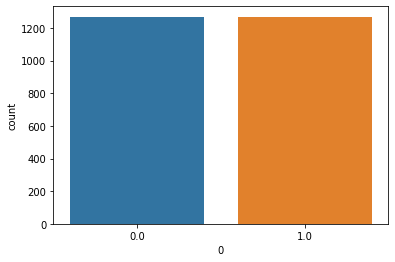

In [ ]:
X_resampled = pd.DataFrame(balanced_data[:,:-1]) 
# convert y_resampled to df
df_y_resampled = pd.DataFrame(balanced_data[:,-1])

# showing a plot of the Balanced dataset 
majority_class = df_y_resampled.loc[df_y_resampled[0] == 0].count()[0]

# Showing the count for Non Hole Deviation 
minority_class = df_y_resampled.loc[df_y_resampled[0] == 1].count()[0]

# Print 
print('Clustomer who stayed: {}'.format(majority_class))
print('Customers who left : {}'.format(minority_class))

sns.countplot(x=0, data=df_y_resampled)
plt.show()

# Oversample the data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to Balance the imbalanced data 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.7/dist-packages/s

In [ ]:
kfold = StratifiedKFold(n_splits = 5)
kfold_y_props = []

for train,test in kfold.split(data[:,:-1],data[:,-1].astype('int')):
    x_train = data[train,:-1]
    y_train = data[train,-1].astype('int')
    x_test = data[test,:-1]
    y_test = data[test,-1].astype('int')
    X_resampled, y_resampled = SMOTE().fit_resample(x_train,y_train)
    model = LogisticRegression()
    model.fit(X_resampled,y_resampled)

    predict_result = model.predict(x_test).astype('float64')
    print(accuracy_score(predict_result, y_test))
    conf_mat = confusion_matrix(y_test,predict_result)
    print(conf_mat)
    print(classification_report(y_test, predict_result))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.7650501672240803
[[664 214]
 [ 67 251]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       878
           1       0.54      0.79      0.64       318

    accuracy                           0.77      1196
   macro avg       0.72      0.77      0.73      1196
weighted avg       0.81      0.77      0.78      1196

0.7539748953974895
[[650 228]
 [ 66 251]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       878
           1       0.52      0.79      0.63       317

    accuracy                           0.75      1195
   macro avg       0.72      0.77      0.72      1195
weighted avg       0.81      0.75      0.77      1195

0.7389121338912134
[[646 232]
 [ 80 237]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.74      0.81       878
           1       0.51      0.75      0.60       317

    accuracy                           0.74      1195
   macro avg       0.70      0.74      0.70      1195
weighted avg       0.79      0.74      0.75      1195

0.7456066945606694
[[645 233]
 [ 71 246]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       878
           1       0.51      0.78      0.62       317

    accuracy                           0.75      1195
   macro avg       0.71      0.76      0.71      1195
weighted avg       0.80      0.75      0.76      1195

0.7481171548117155
[[659 218]
 [ 83 235]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       877
           1       0.52      0.74      0.61       318

    accuracy                           0.75      1195
   macro avg       0.70      0.75      0.71 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
balanced_data.shape

(7024, 20)

Clustomer who stayed: 3505
Customers who left : 3505


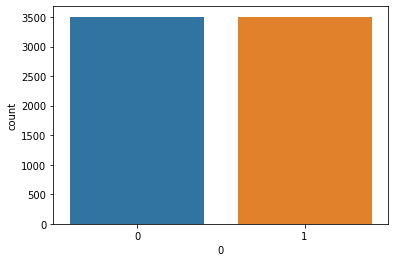

In [ ]:
X_resampled = pd.DataFrame(X_resampled) 
# convert y_resampled to df
df_y_resampled = pd.DataFrame(y_resampled)

# showing a plot of the Balanced dataset 
majority_class = df_y_resampled.loc[df_y_resampled[0] == 0].count()[0]

# Showing the count for Non Hole Deviation 
minority_class = df_y_resampled.loc[df_y_resampled[0] == 1].count()[0]

# Print 
print('Clustomer who stayed: {}'.format(majority_class))
print('Customers who left : {}'.format(minority_class))

sns.countplot(x=0, data=df_y_resampled)
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X_resampled,y_resampled.astype('int'))

predict_result = model.predict(x_test)
print(accuracy_score(predict_result, y_test))
conf_mat = confusion_matrix(y_test,predict_result)
print(conf_mat)
print(classification_report(y_test, predict_result))

0.7466555183946488
[[647 237]
 [ 66 246]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       884
           1       0.51      0.79      0.62       312

    accuracy                           0.75      1196
   macro avg       0.71      0.76      0.71      1196
weighted avg       0.80      0.75      0.76      1196

